<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Practica_3/P3_ECG_AnnyRaigoza_DaironMontes_LauraLlanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA 3
## Análisis estadístico de señales

### **Trabajo realizado por: Anny Elizabeth Raigoza, Dairon Alberto Montes & Laura María Llanos ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚**

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal.
El valor RMS se define en forma discreta con N número de muestras, como:

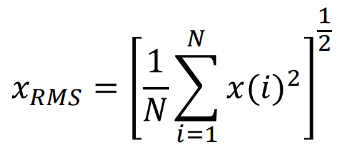

In [3]:
#Importamos las librerías que necesitemos para operar
import numpy as np
import matplotlib.pyplot as plt

def calculoRMS(x):
    N = len(x)  # Número de muestras
    xi2 = np.sum(x**2)  # Suma de los cuadrados de las muestras
    rms = np.sqrt(xi2 / N)  # Cálculo del valor RMS
    return rms

In [4]:
#BIBLIOTECA SCIPY
#Tiene funciones de filtrado para eliminar ruido o interferencias, así como para detectar eventos importantes para la interpretación correcta de las señales.
import scipy

#Al subir el archivo .mat al entorno de Google Colab mediante la función de carga de archivos, se leen los datos con ayuda de la biblioteca scipy.io
from google.colab import files
archivoSubido = files.upload()
datosMATLAB = scipy.io.loadmat('/content/signals.mat')

# El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados.
# Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.
datosECG = datosMATLAB['ECG_asRecording']
ECGfiltrada = datosMATLAB['ECG_filtered']

#Visualización de los datos
filas, columnas = ECGfiltrada.shape
n_filas = filas
n_columnas = columnas
print(n_columnas)
print(n_filas)

Saving signals.mat to signals.mat
30720
1


**Determine el tiempo de duración de las señales, cree un vector de tiempo**

---



In [5]:
# La frecuencia de muestreo indica el número de muestras por segundo. Al obtener el número total de muestras en la señal
# mediante la función signal.size podemos encontrar la duración si dividimos el número de muestras entre 1024Hz.
numeroMuestras = ECGfiltrada.size
duracion = numeroMuestras / 1024
tiempo = np.arange(0, duracion, (1/1024))
print("La duración de la señal ECG es de: ", duracion, "segundos")
print("Vector de tiempo: ", tiempo)

La duración de la señal ECG es de:  30.0 segundos
Vector de tiempo:  [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


**Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y escriba cómo debe ser el comportamiento del filtro que se utilizó.**

**Recuerde las frecuencias de interés de la señal ECG.**

---

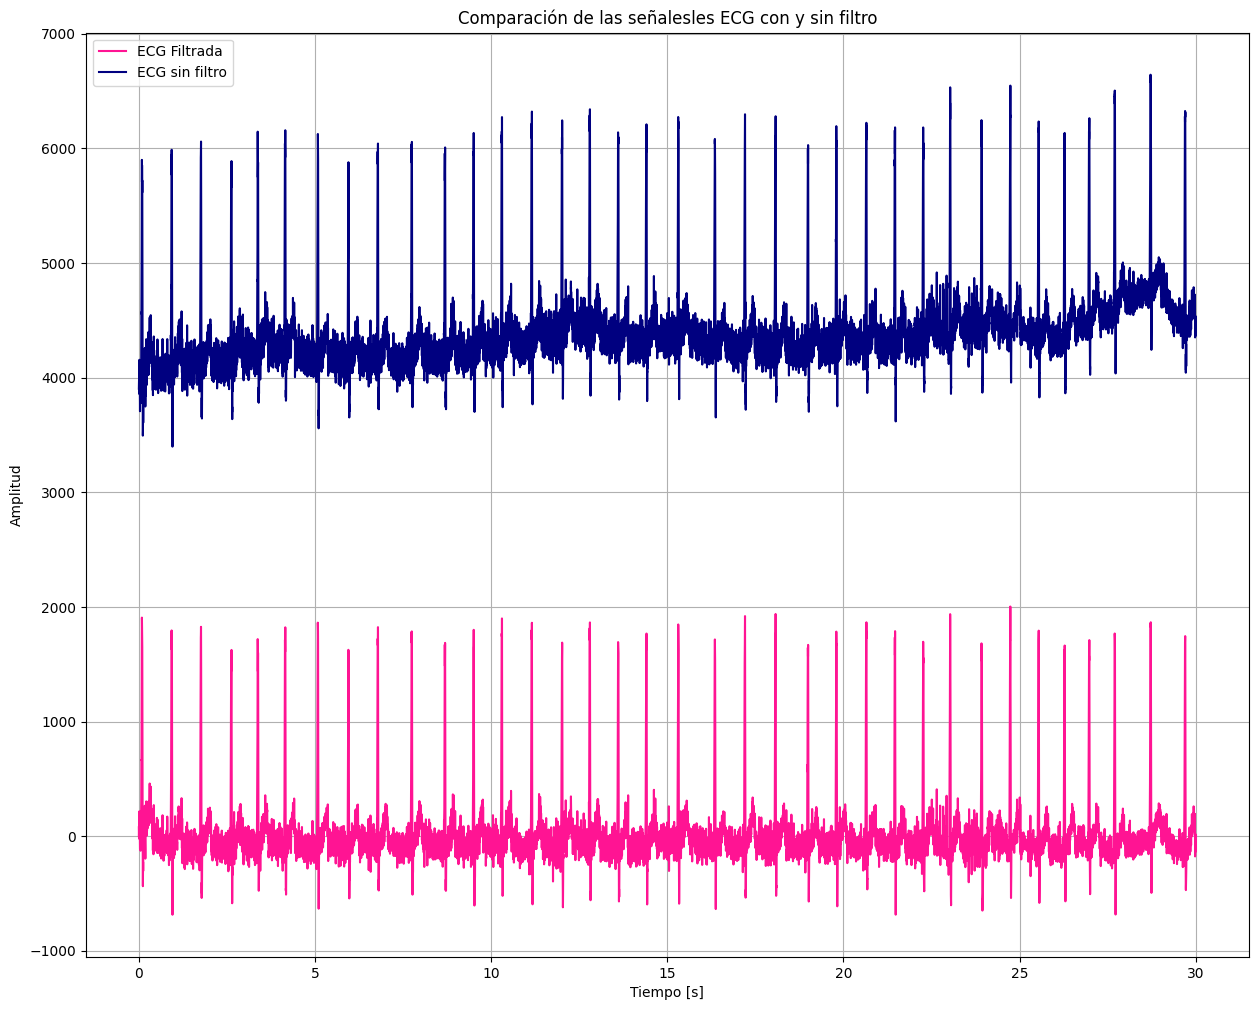

In [6]:
# La función .flatten() es un método que se utiliza en Python para convertir una estructura de datos multidimensional en una estructura unidimensional
# Convertirmos nuestro array en un formato unidimensional para poder graficar.
sinFiltro = datosECG.flatten()
conFiltro = ECGfiltrada.flatten()

# Visualización
plt.figure(figsize=(15, 12))
plt.plot(tiempo, conFiltro, color='deeppink', label='ECG Filtrada')
plt.plot(tiempo, sinFiltro, color='navy', label='ECG sin filtro')
plt.title('Comparación de las señalesles ECG con y sin filtro')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 - - - - - - - - - -
###**EXPLICACIÓN.**


De acuerdo con la gráfica anterior se observa que la señal filtrada de ECG presenta un mayor suavizado en comparación con la señal ECG sin proceso de filtración.
En esta sección es posible identificar la eliminación del offset debido a que la señal filtrada obtenida presenta un punto de variación inicial en cero.
Adicionalmente, las fluctuaciones presentadas en la señal sin filtrar en los intervalos de segundos de [10-15]s y de [25-30]s fueron adecuadamente eliminadas otorgando
una tendencia lineal en el comportamiento de señal filtrada. Por otro lado, en ambas señales se visualizan la presencia de picos correspondientes a los picos
característicos del ciclo cardíaco, siendo estos más fácilmente perceptibles en la señal filtrada.
Un punto importante a resaltar es la cercanía de la señal filtrada con la frecuencia cardíaca promedio hallado en la literatura (la cual corresponde a 1 latido por segundo),
ya que al realizar el conteo de los picos se encontró que en un lapso de 30 segundos se registraron un total de 36 picos cardíacos,
hecho que implica una frecuencia de 1.2 latidos por segundo, permitiendo señalar que el sujeto de prueba se encontraba ligeramente agitado.
Finalmente, se supone la aplicación de dos tipos de filtros para el procesamiento de la señal ECG filtrada,
los cuales consisten en la aplicación de un filtro pasa bajas capaz de eliminar las frecuencias superiores a el rango fisiológico de frecuencias del ciclo cardíaco y
 la aplicación de un filtro pasa altas capaz de suprimir las fluctuaciones de baja frecuencia que no eran útiles para el análisis de la señal.

---

**Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**

---

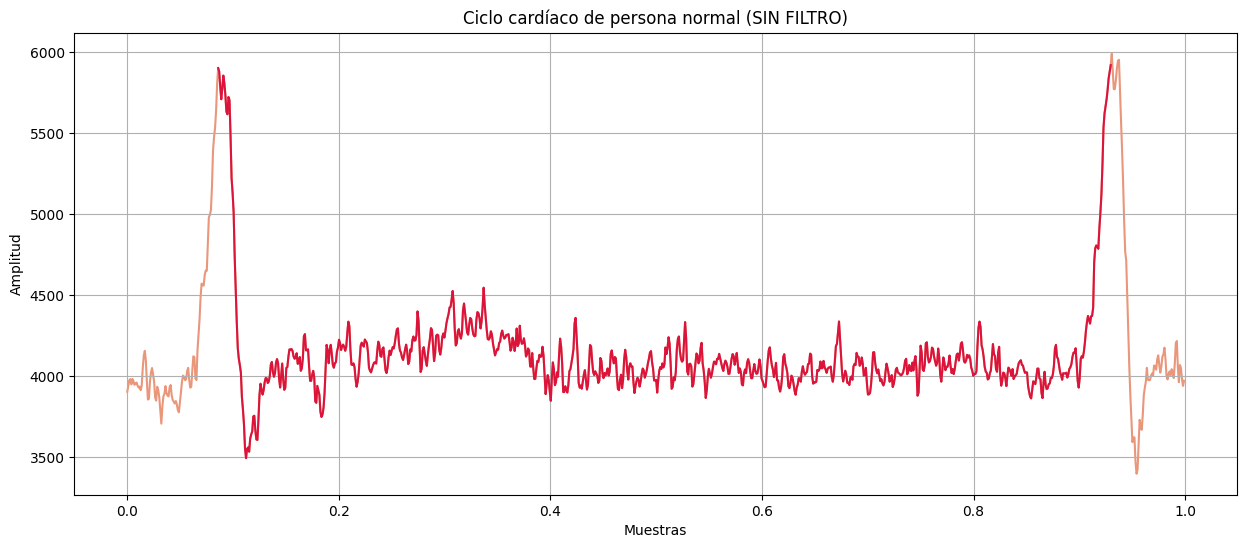


El valor RMS de la señal ECG es:  4142.454957820607
El valor promedio de la señal ECG es:  4131.136266878161
La desviación estándar de la señal ECG es:  306.19374403730194
La varianza de la señal ECG es:  93754.60888758079


In [7]:
#La duración de un ciclo cardíaco puede variar dependiendo de la frecuencia cardíaca de una persona.
#La frecuencia cardíaca promedio es de 0.857 segundos aproximadamente
#Referencia. https://courses.lumenlearning.com/suny-ap2/chapter/cardiac-cycle/#:~:text=The%20cardiac%20cycle%20comprises%20a,atrioventricular%20valves%20into%20the%20ventricles.

#Para un periodo de muestreo T=1/1024
tiempoCiclo = np.arange(0, 1, 1/1024)
cicloCardiaco = sinFiltro[0:tiempoCiclo.size]

#Función para identificar los picos (o máximos locales) en una serie de datos
from scipy.signal import find_peaks
picosCiclo = find_peaks(cicloCardiaco, distance=800)

#Señalando valores de los picos
#Dado que conocemos que tenemos dos picos dentro del ciclo, señalamos las posiciones de estos
pico_I = picosCiclo[0][0]
pico_II = picosCiclo[0][1]

#Se recorta el tiempo a la distancia entre dos picos
cicloPicos = cicloCardiaco[pico_I:pico_II]
tiempoPicos = tiempoCiclo[pico_I:pico_II]

# Visualización
plt.figure(figsize=(15, 6))
plt.plot(tiempoCiclo, cicloCardiaco, color='darksalmon', label='Ciclo completo', zorder=1)
plt.plot(tiempoPicos, cicloPicos, color='crimson', label='Ciclo pico a pico', zorder=2)
plt.title('Ciclo cardíaco de persona normal (SIN FILTRO)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

rmsCiclo = calculoRMS(cicloPicos)
print("\nEl valor RMS de la señal ECG es: ", rmsCiclo)
import statistics
promedioCiclo = statistics.mean(cicloPicos)
print("El valor promedio de la señal ECG es: ", promedioCiclo)
desviaciónCiclo = statistics.stdev(cicloPicos)
print("La desviación estándar de la señal ECG es: ", desviaciónCiclo)
varianzaCiclo = statistics.variance(cicloPicos)
print("La varianza de la señal ECG es: ", varianzaCiclo)

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 - - - - - - - - - -
###**EXPLICACIÓN.**

 De acuerdo con los datos extraídos de la señal sin filtración, se logra identificar un valor RMS alto de 4142.455, este factor hace referencia de la energía y variabilidad de la señal ECG, comportamiento que es claramente evidenciado en la gráfica con los picos y valles propios de la realización de un ciclo cardíaco.
Otro punto para destacar es el valor promedio de la señal, el cual indica que el valor central de los datos se ubica en alrededor de 4131.133. Adicionalmente la desviación estándar, (medida que hace referencia del nivel de dispersión de los valores respecto a su promedio), alcanza un valor elevado de 300.26, esta cifra es respaldada con una varianza incrementada de 93754.6088, donde este comportamiento permite corroborar la alta variabilidad de la señal y las fluctuaciones significativas de la misma, indicando que los datos adquiridos se encuentran relativamente alejados, este suceso puede relacionarse a la posibilidad de ruidos e interferencias (eléctricas o propias del paciente) que distorsionan la adquisición de la información.


---

Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.  

---

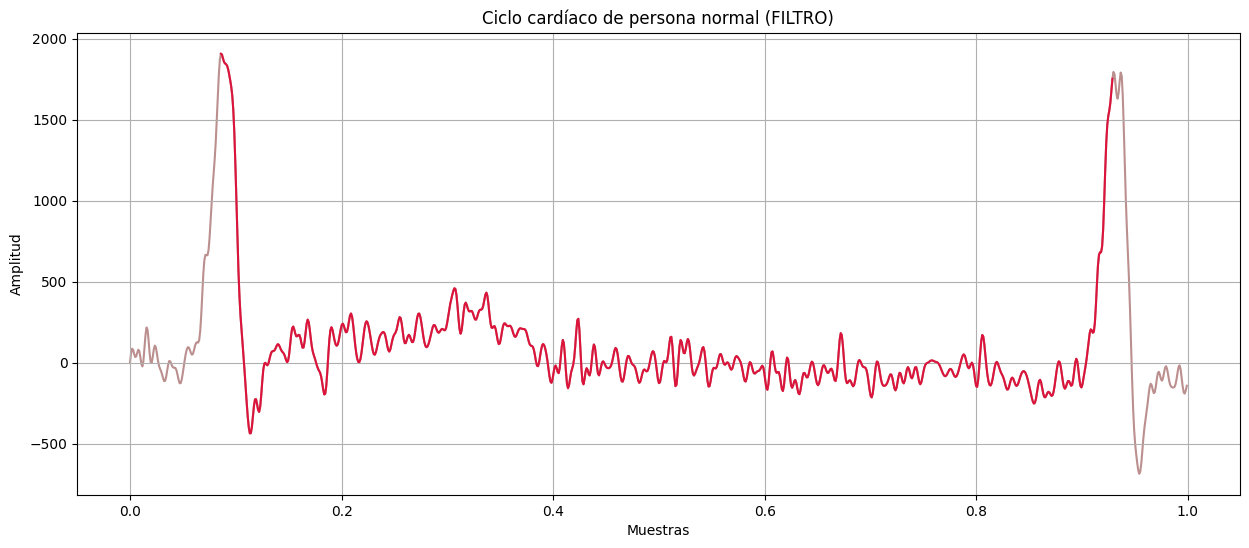


El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  311.12111418570333
La varianza de la señal ECG es:  96796.34769215346


In [8]:
#Para un periodo de muestreo T=1/1024
tiempoCiclo = np.arange(0, 1, 1/1024)
cicloCardiaco = conFiltro[0:tiempoCiclo.size]

#Función para identificar los picos (o máximos locales) en una serie de datos
from scipy.signal import find_peaks
picosCiclo = find_peaks(cicloCardiaco, distance=750)

#Señalando valores de los picos
#Dado que conocemos que tenemos dos picos dentro del ciclo, señalamos las posiciones de estos
pico_I = picosCiclo[0][0]
pico_II = picosCiclo[0][1]

#Se recorta el tiempo a la distancia entre dos picos
cicloPicos = cicloCardiaco[pico_I:pico_II]
tiempoPicos = tiempoCiclo[pico_I:pico_II]

# Visualización
plt.figure(figsize=(15, 6))
plt.plot(tiempoCiclo, cicloCardiaco, color='rosybrown', label='Ciclo completo', zorder=1)
plt.plot(tiempoPicos, cicloPicos, color='crimson', label='Ciclo pico a pico', zorder=2)
plt.title('Ciclo cardíaco de persona normal (FILTRO)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

rmsCiclo = calculoRMS(cicloPicos)
print("\nEl valor RMS de la señal ECG es: ", rmsCiclo)
import statistics
promedioCiclo = statistics.mean(cicloPicos)
print("El valor promedio de la señal ECG es: ", promedioCiclo)
desviaciónCiclo = statistics.stdev(cicloPicos)
print("La desviación estándar de la señal ECG es: ", desviaciónCiclo)
varianzaCiclo = statistics.variance(cicloPicos)
print("La varianza de la señal ECG es: ", varianzaCiclo)

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 - - - - - - - - - -
###**EXPLICACIÓN.**
En primera instancia se observa el decrecimiento del valor RMS a 319.63, indicando la reducción de las fluctuaciones de la señal debido a la implementación de un filtro, por esta razón la energía general de la señal ha disminuido, Por otro lado, el valor medio en el cual se focalizaron los datos fue de 74.01, esta disminución implica un acercamiento al valor de referencia de la señal ECG. Sin embargo, se continúa obteniendo una elevada desviación estándar y varianza, con valores de 311.12 y 96,796.35 respectivamente, conducta que hace referencia a la disparidad y variabilidad de los datos, la cual se justifica a través de las leves diferencias eléctricas obtenidas en cada latido cardíaco.

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 - - - - - - - - - -
Con base a los resultados adquiridos de RMS, se identifica una reducción de este parámetro en la señal filtrada de ECG, por ende, se concluye la reducción de la energía de la señal como consecuencia de la realización de un filtrado efectivo capaz de suprimir el ruido por interferencias eléctricas o demás factores indeseados. Adicionalmente, al analizar la reducción del valor promedio de los datos, el cual pasa de ser 4131.133 en la señal sin filtrado, a 74.01 en la señal con filtro, permite señalar la eliminación del offset en las muestras adquiridas, ya que se evidencia un notorio acercamiento al valor de referencia central. No obstante, medidas como la desviación estándar y la varianza incrementaron su valor (pasando de ser 300.26 y 93754.6088 en la señal sin filtro a 311.12 y 96,796.35 en la señal filtrada respectivamente), este comportamiento denota la variabilidad de la información y sugiere la preservación del comportamiento típico del ciclo cardíaco, el cual se caracteriza por tener leves diferencias eléctricas entre cada evento sucesivo.

---

**Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**

 ---

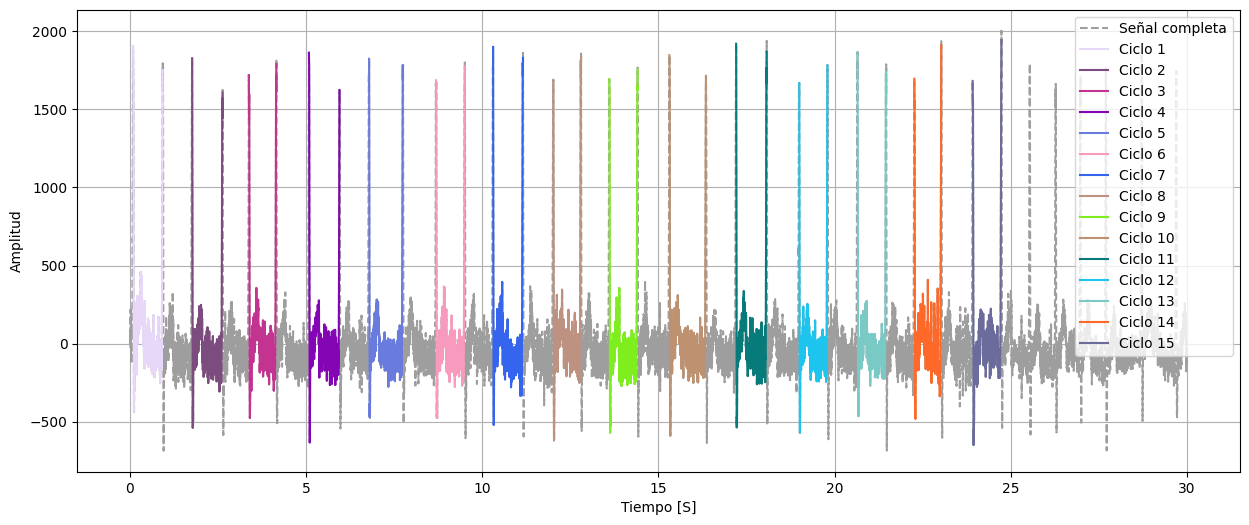


Extrayendo valor promedio y la varianza de cada ciclo:



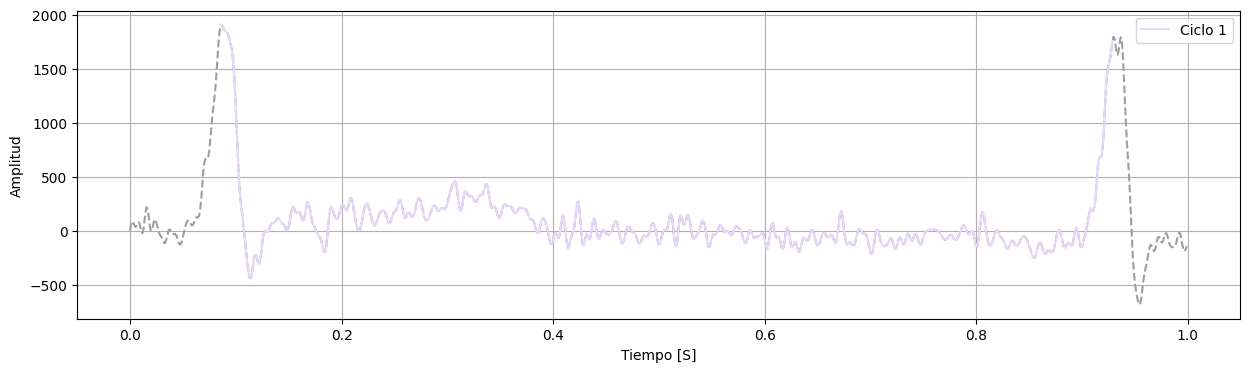


El valor promedio del ciclo 1 de la señal ECG es:  74.00995782055861

La varianza del ciclo 1 de la señal ECG es:  96796.34769215346 



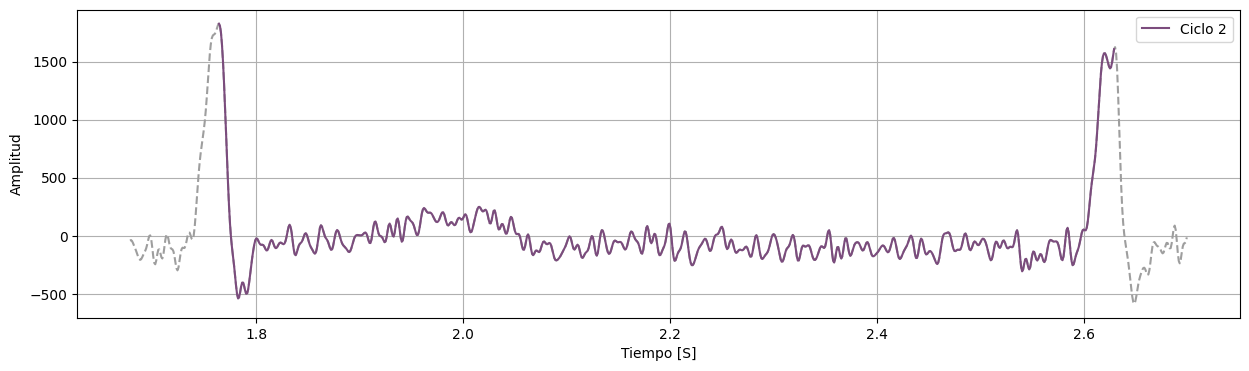


El valor promedio del ciclo 2 de la señal ECG es:  -10.433000231133219

La varianza del ciclo 2 de la señal ECG es:  82544.31118138733 



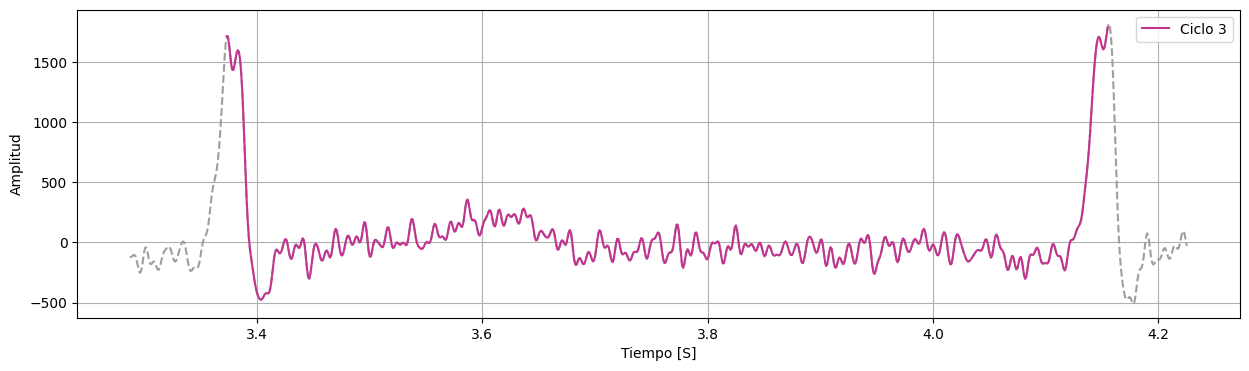


El valor promedio del ciclo 3 de la señal ECG es:  40.87110478533409

La varianza del ciclo 3 de la señal ECG es:  114993.40336046541 



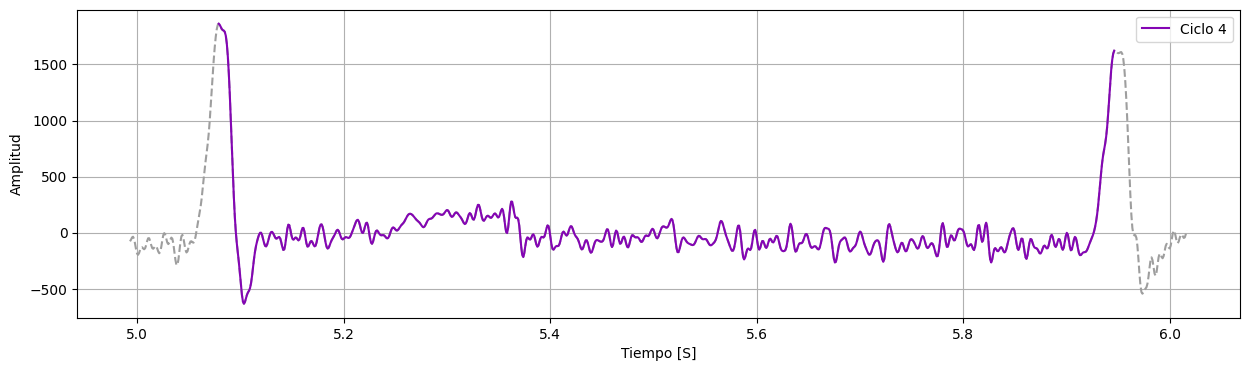


El valor promedio del ciclo 4 de la señal ECG es:  0.4307868593682324

La varianza del ciclo 4 de la señal ECG es:  77794.78940132663 



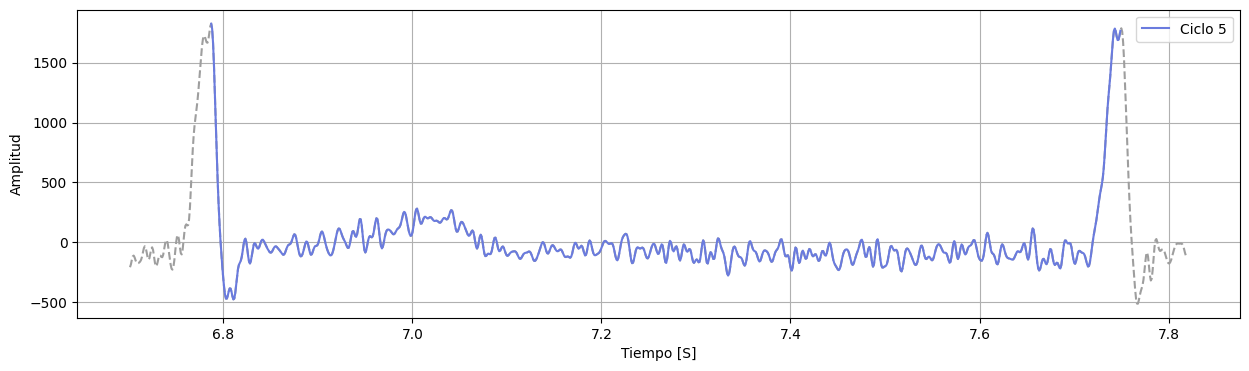


El valor promedio del ciclo 5 de la señal ECG es:  -10.175289840749373

La varianza del ciclo 5 de la señal ECG es:  71857.83391363427 



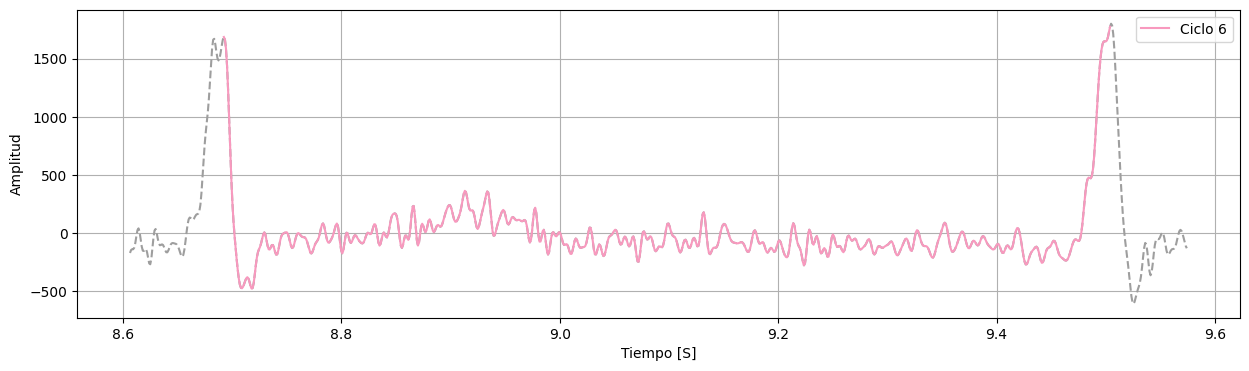


El valor promedio del ciclo 6 de la señal ECG es:  -8.90615825019136

La varianza del ciclo 6 de la señal ECG es:  76179.94733451893 



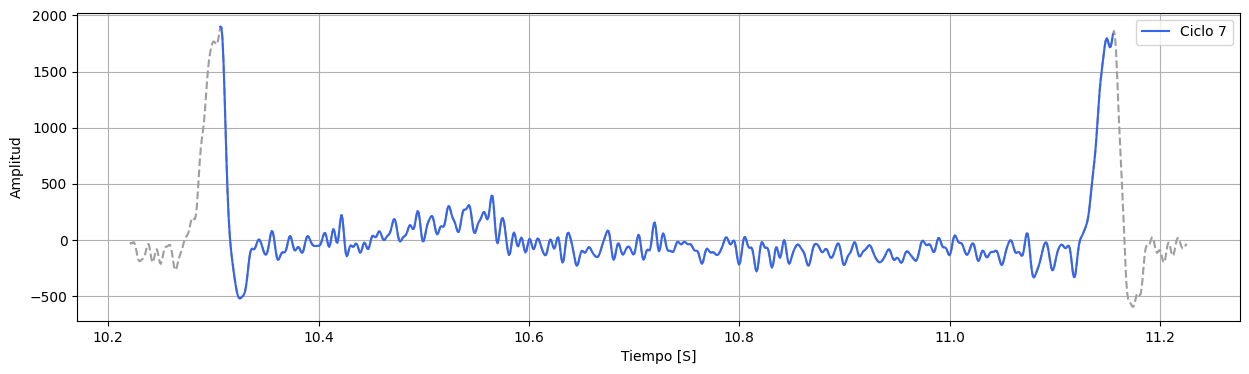


El valor promedio del ciclo 7 de la señal ECG es:  -4.203262548456712

La varianza del ciclo 7 de la señal ECG es:  88052.71449259885 



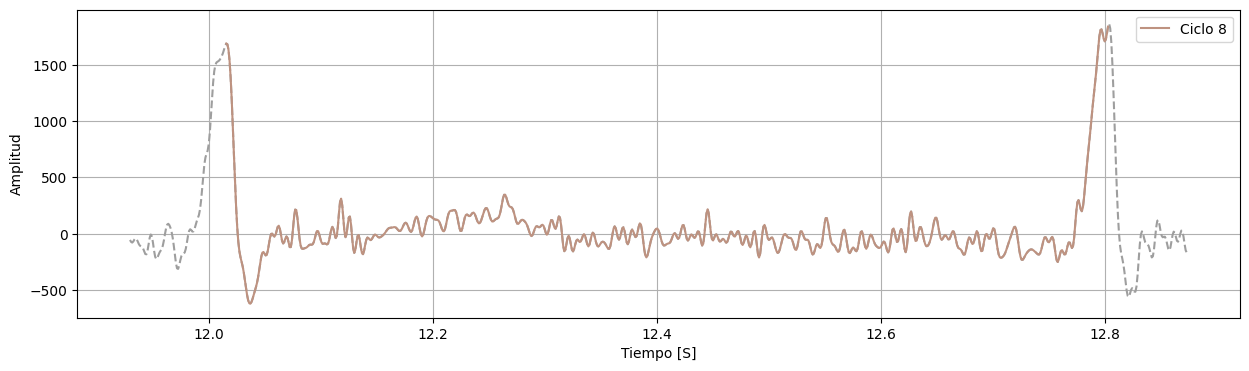


El valor promedio del ciclo 8 de la señal ECG es:  27.108316233516877

La varianza del ciclo 8 de la señal ECG es:  89748.14767862333 



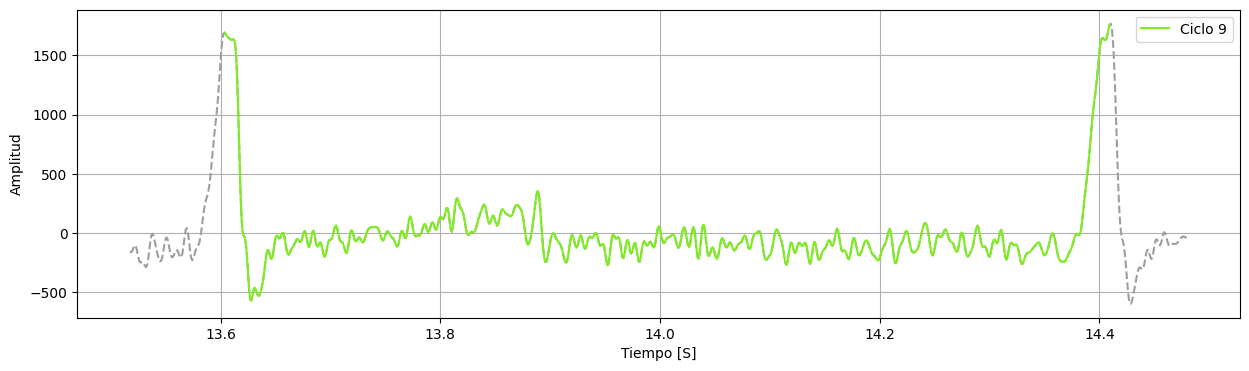


El valor promedio del ciclo 9 de la señal ECG es:  0.2879364678716634

La varianza del ciclo 9 de la señal ECG es:  110689.50104695423 



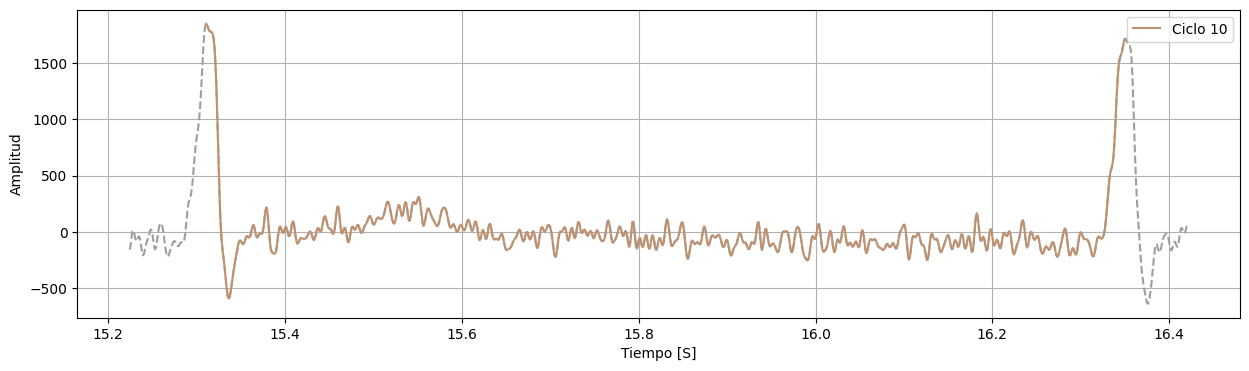


El valor promedio del ciclo 10 de la señal ECG es:  5.6277172402502655

La varianza del ciclo 10 de la señal ECG es:  78467.03437000552 



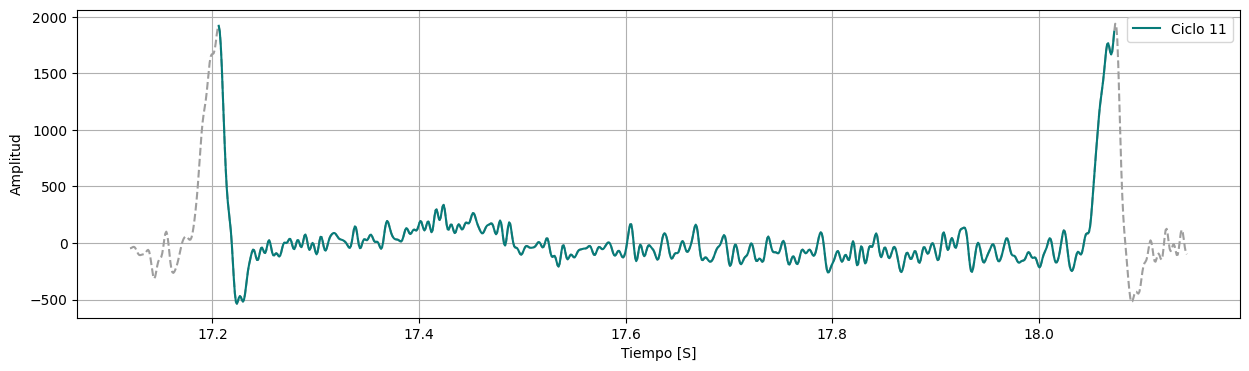


El valor promedio del ciclo 11 de la señal ECG es:  12.47585842583272

La varianza del ciclo 11 de la señal ECG es:  84215.83815724948 



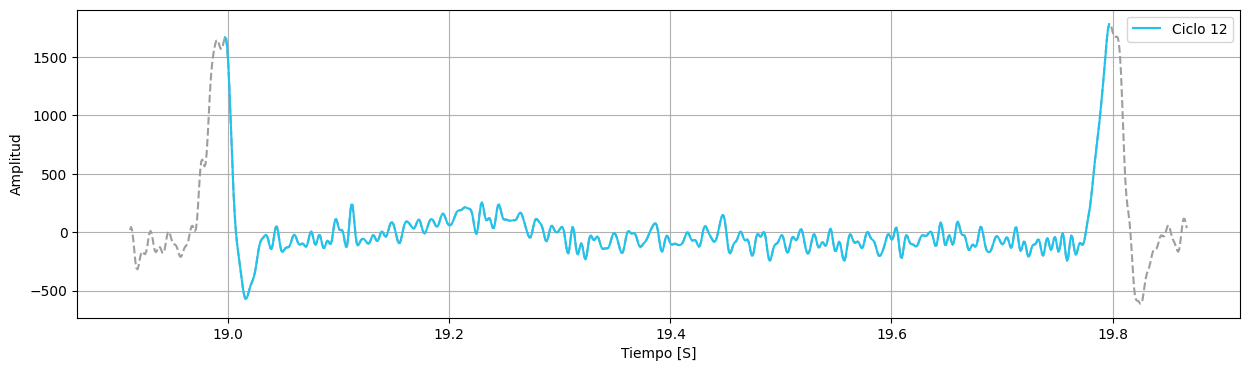


El valor promedio del ciclo 12 de la señal ECG es:  -10.868385454060412

La varianza del ciclo 12 de la señal ECG es:  58737.392367036235 



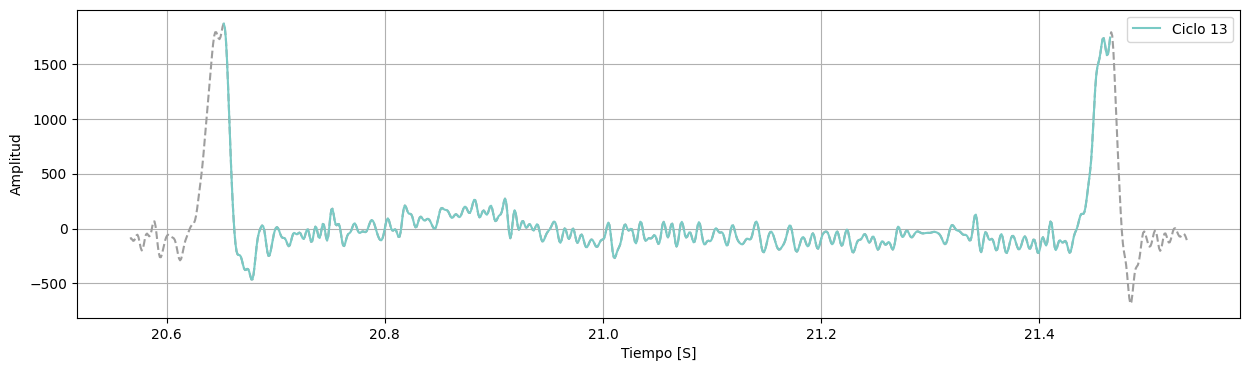


El valor promedio del ciclo 13 de la señal ECG es:  0.8493469218665401

La varianza del ciclo 13 de la señal ECG es:  83155.03547408419 



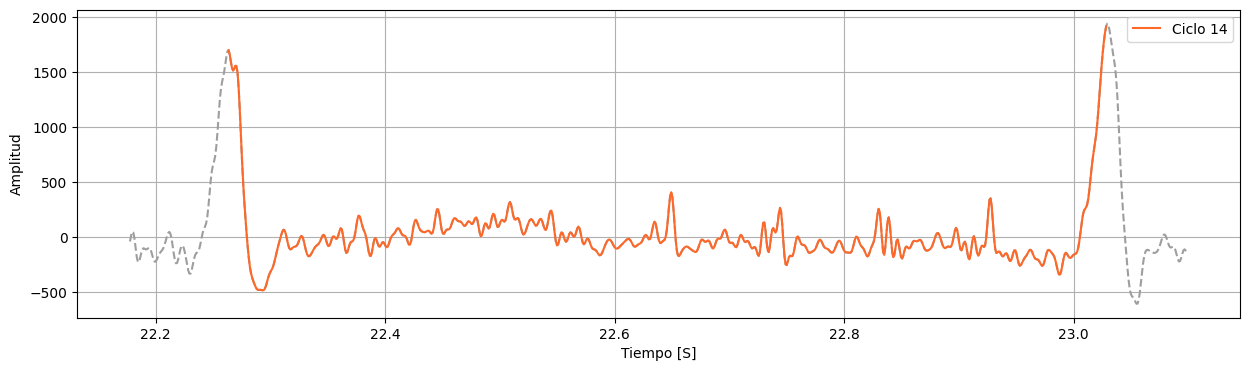


El valor promedio del ciclo 14 de la señal ECG es:  15.964216789409521

La varianza del ciclo 14 de la señal ECG es:  84950.13863632573 



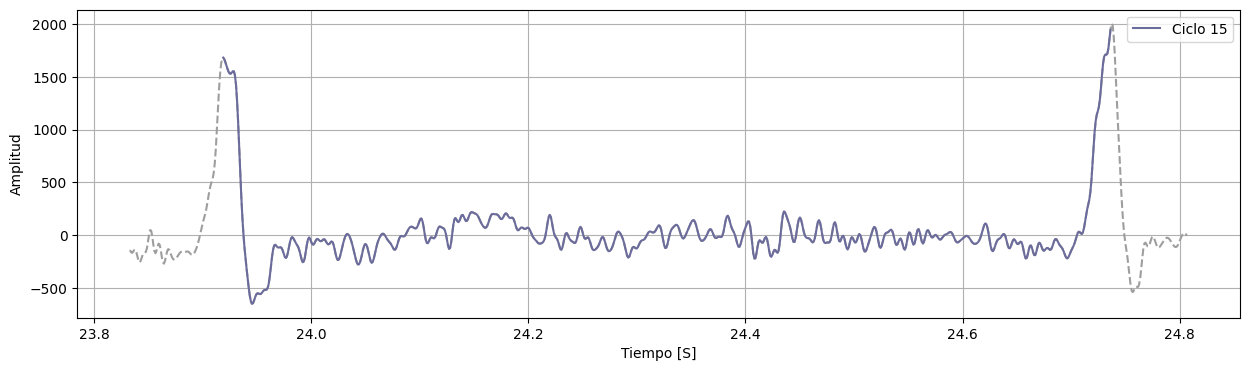


El valor promedio del ciclo 15 de la señal ECG es:  25.650862979803076

La varianza del ciclo 15 de la señal ECG es:  106488.89156478977 



In [9]:
#Así como se observó en los ciclos anteriores tomados, vamos a buscar obtener dos picos por ciclo, donde cada par de picos, serán graficados y analizados estadísticamente como gráficamente

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Datos iniciales

fs = 1024 # Frecuencia de muestreo en Hz
periodo = 1/fs # Periodo de muestreo en s
numeroMuestras = ECGfiltrada.size # Número total de muestras
duracion = numeroMuestras / fs # Duración total de la señal en segundos
tiempo = np.arange(0, duracion, periodo) # Vector tiempo de la señal
conFiltro = ECGfiltrada.flatten() # Vector amplitud de la señal

# Encontramos los picos de la señal
picosSenal, _ = find_peaks(conFiltro, distance=750)

### Creamos una figura donde veríamos todos los segmentos a extraer ###
plt.figure(figsize=(15, 6))
plt.plot(tiempo, conFiltro, label='Señal completa', color='#9e9e9e', linestyle='--') # Mostramos la señal completa

colores = ['#E7D7F9','#7B4C7D','#C33490','#8405B4','#6A7BDE','#F899BE','#3564EE','#BE9280','#7EEE1E','#BE9270','#077B79','#1DC4EE','#79CAC5','#FE6828','#6C6C9C'] #Lista de colores a usar

# Por cada par de picos, se va a gráficar un ciclo
for i in range(0, 30, 2):  # Toma pares consecutivos de picos
    inicio, fin = picosSenal[i], picosSenal[i + 1] # Obtenemos el pico de inicio y el pico final de cada segmento

    # Extraer el segmento de la señal entre los dos picos que representará un ciclo
    segmento = conFiltro[inicio:fin]

    # Crear un rango de posiciones para el vector tiempo
    posiciones = np.arange(inicio, fin)

    # Le damos un color de la lista a cada segmento para identificarlo mejor
    color = colores[i // 2 % len(colores)]

    # Graficar el segmento
    plt.plot(tiempo[posiciones], segmento, label=f'Ciclo {i//2 + 1}', color=color)


# Etiquetas y leyenda
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Mostrar gráfico
plt.show()

### Ahora, tomando cada uno de estos ciclos, los graficamos individualmente para obtener sus valor promedio y la varianza ###
print('\nExtrayendo valor promedio y la varianza de cada ciclo:\n')

for i in range(0, 30, 2):
    inicio, fin = picosSenal[i], picosSenal[i + 1]
    segmento = conFiltro[inicio:fin]
    posiciones = np.arange(inicio, fin)
    plt.figure(figsize=(15, 4))
    color = colores[i // 2 % len(colores)]

    # Intentamos mostrar siempre la gráfica de un ciclo de la señal de picos
    inicio_2, fin_2 = -88 + inicio, 72 + fin
    plt.plot(tiempo[inicio_2:fin_2], conFiltro[inicio_2:fin_2], color='#9e9e9e', linestyle='--')
    plt.plot(tiempo[posiciones], segmento, label=f'Ciclo {i//2 + 1}', color=color)
    plt.grid()
    plt.xlabel('Tiempo [S]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()

    import statistics
    promedioCiclo = statistics.mean(segmento)
    print(f"\nEl valor promedio del ciclo {i//2 + 1} de la señal ECG es: ", promedioCiclo)
    varianzaCiclo = statistics.variance(segmento)
    print(f"\nLa varianza del ciclo {i//2 + 1} de la señal ECG es: ", varianzaCiclo,'\n')

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 - - - - - - - - - -
###**ANÁLISIS**.

En primer lugar una señal estacionaria es aquel conjunto de datos cuya frecuencia es invariante en el tiempo, es decir, la frecuencia es evidente en cada instante temporal [1], ahora bien, la señal ECG analizada desde un aspecto gráfico presenta variaciones significativas en la frecuencia de aparición de picos y valles, siendo únicamente constantes los picos inicial y terminal de cada ciclo, los demás por el contrario presentan disparidad en el orden de aparición de valles y crestas y en las formas de fluctuación de la señal. Por otro lado, a través de una evaluación estadística del valor promedio de la señal y la varianza, se comprueba la versatilidad de los datos anteriormente vista desde el aspecto gráfico, ya que en una señal estacionaria se aspira a que los valores de estos parámetros permanezcan constantes o con cambios poco significativos, por el contrario se halló que los promedios variaron considerablemente entre cada ciclo cardíaco barriendo un rango de valores de referencia desde -10.868 hasta 74.01, conducta similar se evidenció en la varianza, en la cual se observó un intervalo de variación desde 58737.39 a 114993.40, por medio de esta información se puede indicar que la señal no está presentando un comportamiento estacionario debido a los cambios bruscos en las medidas estadísticas de cada ciclo, siendo este el resultado esperado en el análisis de datos, ya que las muestras de electrocardiografía son pesudo periódicas, donde las distancias entre cada pico R deben variar sutilmente, puesto que su similitud alerta de posibles condiciones patológicas [2].

---

**Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t.**

**Determine estadísticamente si existe diferencia estadística entre los ciclos, compruebe los supuestos necesarios para realizar una prueba t, esto es:**

- Normalidad de la variable
- Independencia (se asume que los grupos
son independientes)
- Homocedasticidad (use una prueba de Levene)

**Finalmente realice la prueba t para determinar si existen diferencias entre los ciclos.**

**¿Qué indica este análisis respecto de la estacionariedad? explique.**

**De no cumplirse los requisitos, realice entonces un análisis no paramétrico
(prueba U de Mann-Whitney).**

---

**PRUEBA PARA EL PRIMER PAR DE CICLOS**

Tomamos los ciclos denominados ciclo 1 y ciclo 15, los cuales representan el primer y último ciclo de los anteriormente calculados

Ciclo 1:


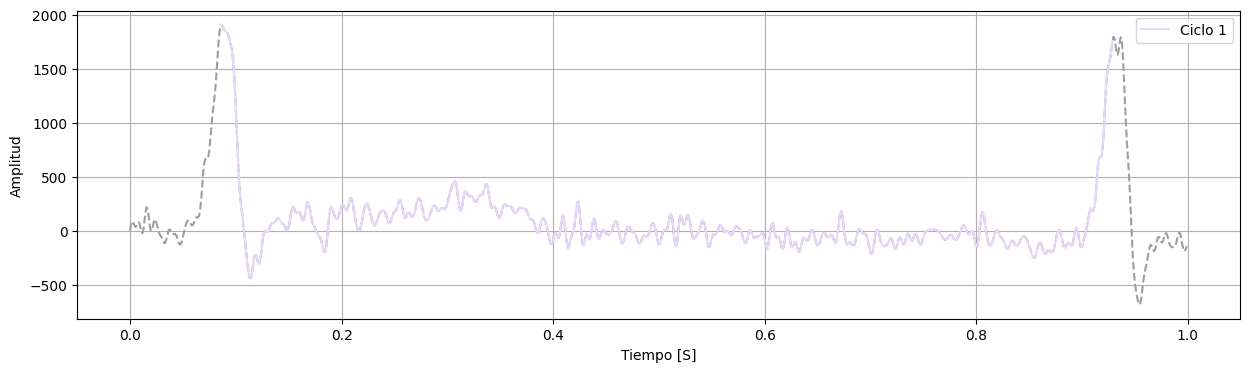



P-valor para el ciclo 1: 0.00
La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.


Ciclo 15:


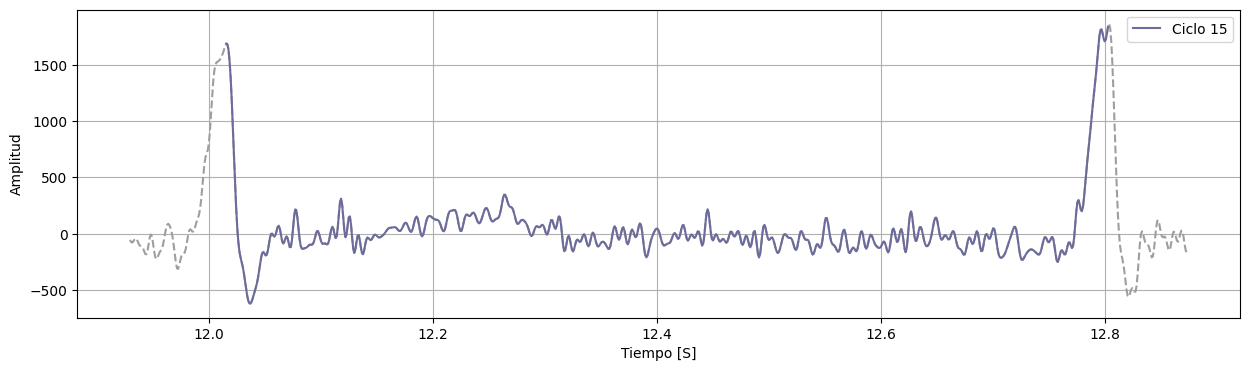



P-valor para el ciclo 15: 0.00
La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.


Homocedasticidad:

Realizamos la prueba de homocedasticidad de Levene para los ciclos 1 y 15: 
P-valor para el ciclo 1 y 15: 0.08
La hipótesis nula NO se rechaza. Los datos provienen de distribuciones con varianzas iguales.




In [10]:
# Para realizar la prueba t, debemos analizar los aspectos de normalidad, de independencia y homocedasticidad
# Primero, debemos seleccionar dos ciclos de la señal que tomaremos para realizar las dos comparaciones
# Tomaremos primero los ciclos 1 y 15, y para ambos comprobamos normalidad y homocedasticidad

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Datos iniciales
fs = 1024 # Frecuencia de muestreo en Hz
periodo = 1/fs # Periodo de muestreo en s
numeroMuestras = ECGfiltrada.size # Número total de muestras
duracion = numeroMuestras / fs # Duración total de la señal en segundos
tiempo = np.arange(0, duracion, periodo) # Vector tiempo de la señal
conFiltro = ECGfiltrada.flatten() # Vector amplitud de la señal

# Encontramos los picos de la señal
picosSenal, _ = find_peaks(conFiltro, distance=750)

###--- CICLO 1 ---###

# Seleccionamos los picos del ciclo 1
inicio, fin = picosSenal[1 - 1], picosSenal[1]
segmento_1 = conFiltro[inicio:fin]
posiciones = np.arange(inicio, fin)
plt.figure(figsize=(15, 4))

# Visualización de la gráfica del primer ciclo
print("Ciclo 1:")
inicio_2, fin_2 = -88 + inicio, 72 + fin
plt.plot(tiempo[inicio_2:fin_2], conFiltro[inicio_2:fin_2], color='#9e9e9e', linestyle='--')
plt.plot(tiempo[posiciones], segmento_1, label=f'Ciclo {1}', color='#E7D7F9')
plt.grid()
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
print("\n")

# Prueba de normalidad (Shapiro) para el ciclo 1
_, p_valor_ciclo_1 = shapiro(segmento_1)
print(f'P-valor para el ciclo 1: {p_valor_ciclo_1:.2f}')

if p_valor_ciclo_1 > 0.05:
    print('La hipótesis nula NO es rechazada. Los datos del ciclo 1 se ajustan a una distribución normal.')
else:
    print('La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.')
print("\n")

###--- CICLO 15 ---###

# Seleccionamos los picos del ciclo 15
inicio, fin = picosSenal[15 - 1], picosSenal[15]
segmento_15 = conFiltro[inicio:fin]
posiciones = np.arange(inicio, fin)
plt.figure(figsize=(15, 4))

# Visualización de la gráfica del último ciclo
print("Ciclo 15:")
inicio_2, fin_2 = -88 + inicio, 72 + fin
plt.plot(tiempo[inicio_2:fin_2], conFiltro[inicio_2:fin_2], color='#9e9e9e', linestyle='--')
plt.plot(tiempo[posiciones], segmento_15, label=f'Ciclo {15}', color='#6C6C9C')
plt.grid()
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
print("\n")

# Prueba de normalidad (Shapiro) para el ciclo 15
_, p_valor_ciclo_15 = shapiro(segmento_15)
print(f'P-valor para el ciclo 15: {p_valor_ciclo_15:.2f}')

if p_valor_ciclo_15 > 0.05:
    print('La hipótesis nula NO es rechazada. Los datos del ciclo 1 se ajustan a una distribución normal.')
else:
    print('La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.')
print("\n")

print("Homocedasticidad:\n")
print("Realizamos la prueba de homocedasticidad de Levene para los ciclos 1 y 15: ")
_, p_valor_homocedasticidad = levene(segmento_1, segmento_15)
print(f'P-valor para el ciclo 1 y 15: {p_valor_homocedasticidad:.2f}')

if p_valor_homocedasticidad > 0.05:
  print('La hipótesis nula NO se rechaza. Los datos provienen de distribuciones con varianzas iguales.')
else:
  print('La hipótesis nula se rechaza. Los datos NO provienen de distribuciones con varianzas iguales.')
print("\n")

# ---------- --- ---- ---- ❣ -----------

###**DiISCUSIÓN PRUEBA PARAMÉTRICA CICLOS 1 AL 15**

Con el objetivo de realizar un análisis inferencial de los datos de la señal ECG se implementaron los supuestos a cumplir para desarrollar una prueba paramétrica, los cuales se basan en:
1.	**Normalidad:** La distribución de los datos sigue una tendencia conocida (normal), para este criterio se establecieron las siguientes hipótesis:

*•	Hipótesis nula H(o):*  las muestras siguen una distribución conocida (normal)

*•	Hipótesis alternativa H(a):* las muestras no se distribuyen en una tendencia conocida (normal).
NOTA: Es importante resaltar que este criterio tiene mayor relevancia para la selección de las pruebas inferenciales, siendo este el que debe ser principalmente cumplido para realizar una prueba paramétrica.
2.	**Homocedasticidad:**  la varianza entre cada grupo de muestras (que en este caso es cada ciclo cardíaco) debe ser igual, para este supuesto se establecen las siguientes hipótesis:

*•Hipótesis nula H(o):* La varianza entre cada ciclo cardíaco es la misma.

*•	Hipótesis alternativa H(a):*  al menos una de las varianzas entre cada ciclo cardíaco es distinta.
3.	**Independencia:** cada observación debe ser independiente de otra, por consecuente el muestreo es aleatorio, debido a que en nuestra disposición no es posible garantizar este hecho en la adquisición de la señal se ASUME este comportamiento en los datos.

Continuando con lo anterior, se observa que en los ciclos 1 y 15 de la señal ECG se obtiene un valor p < 0.05 hecho que indica que las muestras no poseen una tendencia conocida (distribución normal) por consecuente se rechaza la hipótesis nula de normalidad, y debido a que este criterio se ha seleccionado como el factor de mayor relevancia, al no cumplirse se opta por la utilización de una prueba no paramétrica.
Por otra parte, en el análisis del supuesto de homocedasticidad se identifica un valor p > 0.05 razón por la cual se conserva la hipótesis nula en la cual se expresa que la varianza entre cada ciclo es igual. Sin embargo, al no cumplirse el criterio de normalidad, se acude a la realización de una prueba No paramétrica U de Mann-Whitney



In [11]:
from scipy.stats import mannwhitneyu

_, p_valor_no_parametrica = mannwhitneyu(segmento_1, segmento_15)
print(f'Valor p de la prueba no paramétrica: {p_valor_no_parametrica:.2f}')

if p_valor_no_parametrica < 0.05:
    print('Se rechaza la hipótesis nula. Existe evidencia de una diferencia entre los ciclos 1 y 15.')
else:
    print('No se encontró suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los ciclos 1 y 15.')

Valor p de la prueba no paramétrica: 0.00
Se rechaza la hipótesis nula. Existe evidencia de una diferencia entre los ciclos 1 y 15.


**DISCUSIÓN PRUEBA NO PARAMÉTRICA CICLOS 1 AL 15**

Por medio de la prueba no paramétrica U de Mann-Whitney es posible determinar si las muestras provienen de la misma población o si una muestra cuenta con valores más elevados que otra. Para evaluar este comportamiento se establecieron las siguientes hipótesis:

•**Hipótesis nula H(o):** Las muestras de la señal ECG cuentan con la misma distribución.

•**Hipótesis alternativa H(a):**  las muestras de la señal ECG tienen distribuciones distintas, donde las medianas de cada ciclo son diferentes y no se deben a puntos atípicos.

Para el caso de los ciclos 1 y 15 se obtuvo un p < 0.05 por consecuente se rechaza la hipótesis nula y se indica que las muestras de cada ciclo de ECG tienen distribuciones y medianas diferentes.



#---------------- ---- -- ❣ ---- ------------

**PRUEBA PARA EL SEGUNDO PAR DE CICLOS**

Tomamos los ciclos denominados ciclo 5 y ciclo 10, los cuales representan el quinto y decimo ciclo de los anteriormente calculados

Ciclo 5:


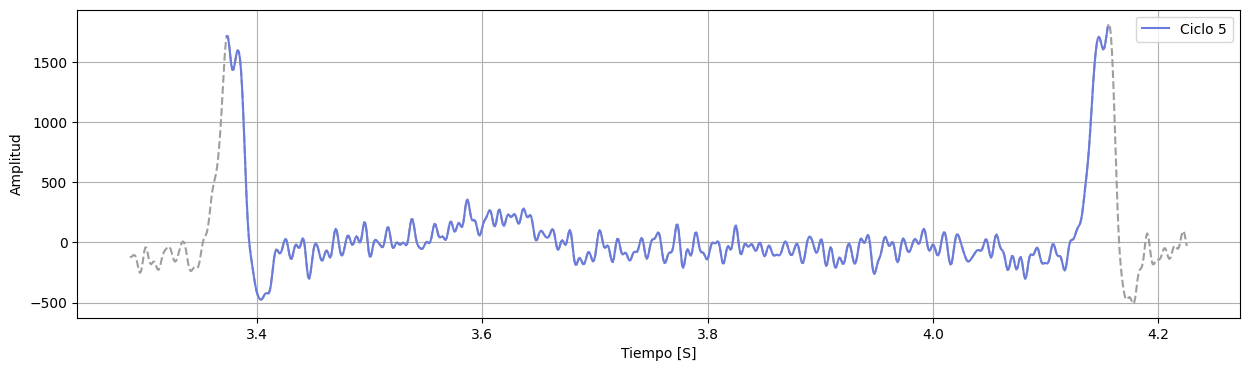



P-valor para el ciclo 5: 0.00
La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.


Ciclo 10:


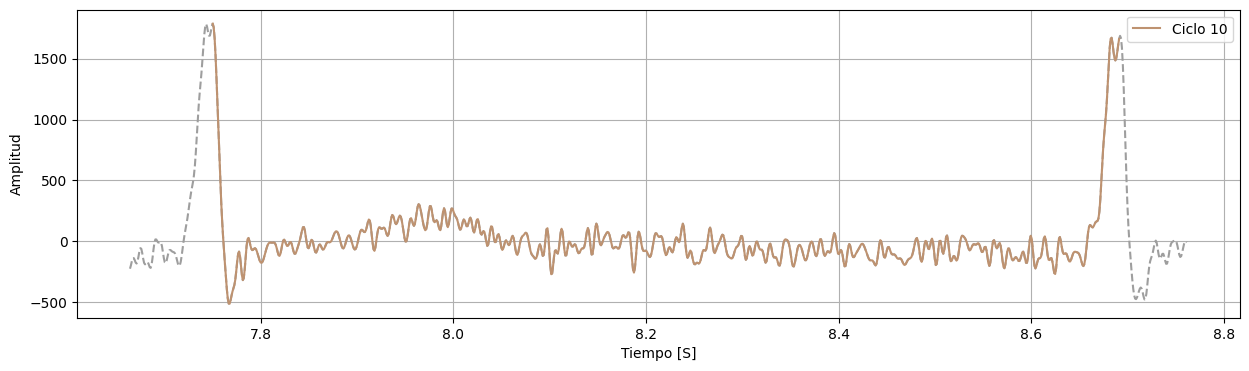



P-valor para el ciclo 10: 0.00
La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.


Homocedasticidad:

Realizamos la prueba de homocedasticidad de Levene para los ciclos 5 y 10: 
P-valor para el ciclo 5 y 10: 0.01
La hipótesis nula se rechaza. Los datos NO provienen de distribuciones con varianzas iguales.




In [12]:
# Para realizar la prueba t, debemos analizar los aspectos de normalidad, de independencia y homocedasticidad
# Ahora, debemos seleccionar otros dos ciclos de la señal que tomaremos para realizar las dos comparaciones
# Tomaremos ahora los ciclos 5 y 10, y para ambos comprobamos normalidad y homocedasticidad

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Datos iniciales
fs = 1024 # Frecuencia de muestreo en Hz
periodo = 1/fs # Periodo de muestreo en s
numeroMuestras = ECGfiltrada.size # Número total de muestras
duracion = numeroMuestras / fs # Duración total de la señal en segundos
tiempo = np.arange(0, duracion, periodo) # Vector tiempo de la señal
conFiltro = ECGfiltrada.flatten() # Vector amplitud de la señal

# Encontramos los picos de la señal
picosSenal, _ = find_peaks(conFiltro, distance=750)

###--- CICLO 5 ---###

# Seleccionamos los picos del ciclo 5
inicio, fin = picosSenal[5 - 1], picosSenal[5]
segmento_5 = conFiltro[inicio:fin]
posiciones = np.arange(inicio, fin)
plt.figure(figsize=(15, 4))

# Visualización de la gráfica del quinto ciclo
print("Ciclo 5:")
inicio_2, fin_2 = -88 + inicio, 72 + fin
plt.plot(tiempo[inicio_2:fin_2], conFiltro[inicio_2:fin_2], color='#9e9e9e', linestyle='--')
plt.plot(tiempo[posiciones], segmento_5, label=f'Ciclo {5}', color='#6A7BDE')
plt.grid()
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
print("\n")

# Prueba de normalidad (Shapiro) para el ciclo 1
normalidad_ciclo_5, p_valor_ciclo_5 = shapiro(segmento_5)
#print(f'Estadístico de prueba: {normalidad_ciclo_5:.2f}')
print(f'P-valor para el ciclo 5: {p_valor_ciclo_5:.2f}')

if p_valor_ciclo_5 > 0.05:
    print('La hipótesis nula NO es rechazada. Los datos del ciclo 1 se ajustan a una distribución normal.')
else:
    print('La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.')
print("\n")

###--- CICLO 10 ---###

# Seleccionamos los picos del ciclo 15
inicio, fin = picosSenal[10 - 1], picosSenal[10]
segmento_10 = conFiltro[inicio:fin]
posiciones = np.arange(inicio, fin)
plt.figure(figsize=(15, 4))

# Visualización de la gráfica del último ciclo
print("Ciclo 10:")
inicio_2, fin_2 = -88 + inicio, 72 + fin
plt.plot(tiempo[inicio_2:fin_2], conFiltro[inicio_2:fin_2], color='#9e9e9e', linestyle='--')
plt.plot(tiempo[posiciones], segmento_10, label=f'Ciclo {10}', color='#BE9270')
plt.grid()
plt.xlabel('Tiempo [S]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
print("\n")

# Prueba de normalidad (Shapiro) para el ciclo 15
normalidad_ciclo_10, p_valor_ciclo_10 = shapiro(segmento_10)
#print(f'Estadístico de prueba: {normalidad_ciclo_15:.2f}')
print(f'P-valor para el ciclo 10: {p_valor_ciclo_10:.2f}')

if p_valor_ciclo_10 > 0.05:
    print('La hipótesis nula NO es rechazada. Los datos del ciclo 1 se ajustan a una distribución normal.')
else:
    print('La hipótesis nula es rechazada. Los datos del ciclo 1 NO se ajustan a una distribución normal.')
print("\n")

print("Homocedasticidad:\n")
print("Realizamos la prueba de homocedasticidad de Levene para los ciclos 5 y 10: ")
homocedasticidad, p_valor_homocedasticidad = levene(segmento_5, segmento_10)
#print(f'Homocedasticidad: {homocedasticidad:.2f}')
print(f'P-valor para el ciclo 5 y 10: {p_valor_homocedasticidad:.2f}')

if p_valor_homocedasticidad > 0.05:
  print('La hipótesis nula NO se rechaza. Los datos provienen de distribuciones con varianzas iguales.')
else:
  print('La hipótesis nula se rechaza. Los datos NO provienen de distribuciones con varianzas iguales.')
print("\n")

#----------- ---- ❣ ----- -----------------
**DISCUSIÓN PRUEBA PARAMÉTRICA CICLOS 5 AL 10**

El mismo análisis anteriormente expresado se realizó entre ciclos intermedios de la señal (ciclo 5 y ciclo 10 de la señal ECG), es así como se encontró que para el supuesto de normalidad se obtuvo un p < 0.05 razón por la cual se rechaza la hipótesis nula, que expresa que los datos cuentan con una tendencia conocida, y se opta por la realización de una prueba No paramétrica. Adicionalmente, el criterio de homocedasticidad corrobora esta elección, ya que se encontró un valor p < 0.05 entre los ciclos 5 y 10 del evento cardíaco, por ende, las muestras cuentan con distintas varianzas.
Como consecuencia de todo lo anterior, se utiliza la prueba U de Mann- Whitney



In [13]:
from scipy.stats import mannwhitneyu

_, p_valor_no_parametrica = mannwhitneyu(segmento_5, segmento_10)
print(f'Valor p de la prueba no paramétrica: {p_valor_no_parametrica:.2f}')

if p_valor_no_parametrica < 0.05:
    print('Se rechaza la hipótesis nula. Existe evidencia de una diferencia entre los ciclos 5 y 10.')
else:
    print('No se encontró suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los ciclos 5 y 10.')

Valor p de la prueba no paramétrica: 0.15
No se encontró suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los ciclos 5 y 10.


# --------- ---- ❣ -------- ----

**DISCUSIÓN PRUEBA NO PARAMÉTRICA CICLOS 5 AL 10**

Para el análisis de los ciclos 5 y 10 se sostuvieron las hipótesis anteriores donde:

**•	Hipótesis nula H(o):**  Las muestras de la señal ECG cuentan con la misma distribución.

**•	Hipótesis alternativa H(a):**  las muestras de la señal ECG tienen distribuciones distintas, donde las medianas de cada ciclo son diferentes y no se deben a puntos atípicos.

No obstante, para este caso se obtuvo un valor p > 0.05 por consecuente se sostiene la hipótesis nula ya que no se posee suficiente evidencia para concluir que las muestras se distribuyen de forma distinta.


##**Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad).**

---

In [15]:
# Realizando prueba Dickey-Fuller a la señal según el método dado

from statsmodels.tsa.stattools import adfuller

result = adfuller(np.squeeze(conFiltro))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.654659
p-value: 0.858147
Critical Values: {'1%': -3.430563031267381, '5%': -2.8616341541406003, '10%': -2.5668201153621077}


# ----- ---- ❣ ---- ----------

**PRUEBA DICKEY-FULLER**

Para llevar a cabo la prueba de Dickey-Fuller, se formularon las siguientes hipótesis:

**Hipótesis nula (H₀):** El ciclo de la señal ECG contiene una raíz unitaria, lo que indica que la señal es no estacionaria. En este caso, las propiedades estadísticas, como la media y la varianza, no se mantienen constantes a lo largo del tiempo.

**Hipótesis alternativa (H₁):** El ciclo de la señal ECG no contiene una raíz unitaria, lo que sugiere que la señal es estacionaria, y por tanto, la media y la varianza se mantienen constantes en el tiempo.

Resultados de la prueba:

- Estadístico de la prueba: -0.654659
- Valor p: 0.8581
- Valores críticos: {'1%': -3.4306, '5%': -2.8616, '10%': -2.5668}

Dado que el valor estadístico es mayor que los valores críticos cercanos a cero, **no se puede rechazar la hipótesis nula**. Esto implica que la señal sigue siendo no estacionaria, ya que se identifica la presencia de una raíz unitaria. Además, el valor p, que es significativamente mayor que el estadístico de prueba, refuerza esta conclusión al no proporcionar suficiente evidencia para refutar la hipótesis nula.

#**CONCLUSIONES**

✦ Se encontró que el proceso de filtrado disminuye el valor promedio de la señal, acercándose al valor de referencia central esperado para una señal ECG después de eliminar el offset. Esto indica que la filtración ha eliminado el componente de sesgo y ha centrado mejor los datos alrededor del valor medio esperado.

✦ Los valores de promedio y varianza indican que la filtración ha mejorado la calidad de la señal eliminando y reduciendo el ruido. Sin embargo, la variabilidad intrínseca del ciclo cardíaco aún persiste, lo cual puede ser consistente con las fluctuaciones naturales en el ritmo cardíaco.

✦ La comparación entre las señales mediante medidas estadísticas ayudó a identificar los cambios aplicados por el filtro, no obstante, en algunos casos se preservó la variabilidad inherente al ciclo cardíaco, lo cual, indica que el filtrado no eliminó información crucial de la señal dado al resultado obtenido en la varianza.

#**REFERENCIAS**

[1] 	WordPress, «Teoría de ondas,» 06 2016. [En línea]. Available: https://sunandclimate.wordpress.com/wp-content/uploads/2010/01/teoria-de-senales-jimmy.pdf. [Último acceso: 09 2024].

[2] 	J. Brian W, R. Barrett-Jolley, A. Krige y I. D. Welters, «Heart rate variability: Measurement and emerging use in critical care medicine,» Journal of the intensive Care Society, vol. 21, nº 2, pp. 148-157, 2019.



